## General imports

In [1]:
import pandas as pd

# Preparing training dataset

In [2]:
dataset_path = './data/train.csv'
full_df = pd.read_csv(dataset_path)
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I decided to ignore the following columns: Ticket number, passenger name, cabin number and place embarked

In [3]:
dataset_path = './data/train.csv'
columns_to_keep = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df = pd.read_csv(dataset_path, usecols=columns_to_keep)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


## Missing values

Info shows that age has missing values.
I'll be using average age in order to handle those missing values.

In [5]:
df.hist(column='Age')
print('mean:', df['Age'].mean())
print('median:', df['Age'].median())
print('mode:', df['Age'].mode())

mean: 29.69911764705882
median: 28.0
mode: 0    24.0
dtype: float64


In [6]:
avg_age = df['Age'].mean()
print(f'Replacing missing ages with average: {avg_age}')
df['Age'] = df['Age'].fillna(avg_age)

Replacing missing ages with average: 29.69911764705882


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


As we can see, there aren't more missing values

## Categorical features

Now we are going to replace categorical features for numerical values

In [8]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


# Training the models

### Training data

In [9]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = df[features]
y_train = df['Survived']

### Preparing testing data

In [10]:
testing_path = './data/test.csv'
df_test = pd.read_csv(testing_path, usecols=['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [11]:
# Apply same pre-processing as training data
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df_test['Sex'] = df_test['Sex'].astype('category')
df_test['Sex'] = df_test['Sex'].cat.codes

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int8
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int64(4), int8(1)
memory usage: 20.1 KB


In [13]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [14]:
X_test = df_test[features] ## same features defined for training

## Simple Decision tree

In [15]:
from sklearn import tree

In [16]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
print(list(zip(X.columns, clf.feature_importances_)))

[('Pclass', 0.10780566092684321), ('Sex', 0.3093351886283387), ('Age', 0.24845449009385379), ('SibSp', 0.04637894744239103), ('Parch', 0.03323270913805543), ('Fare', 0.25479300377051783)]


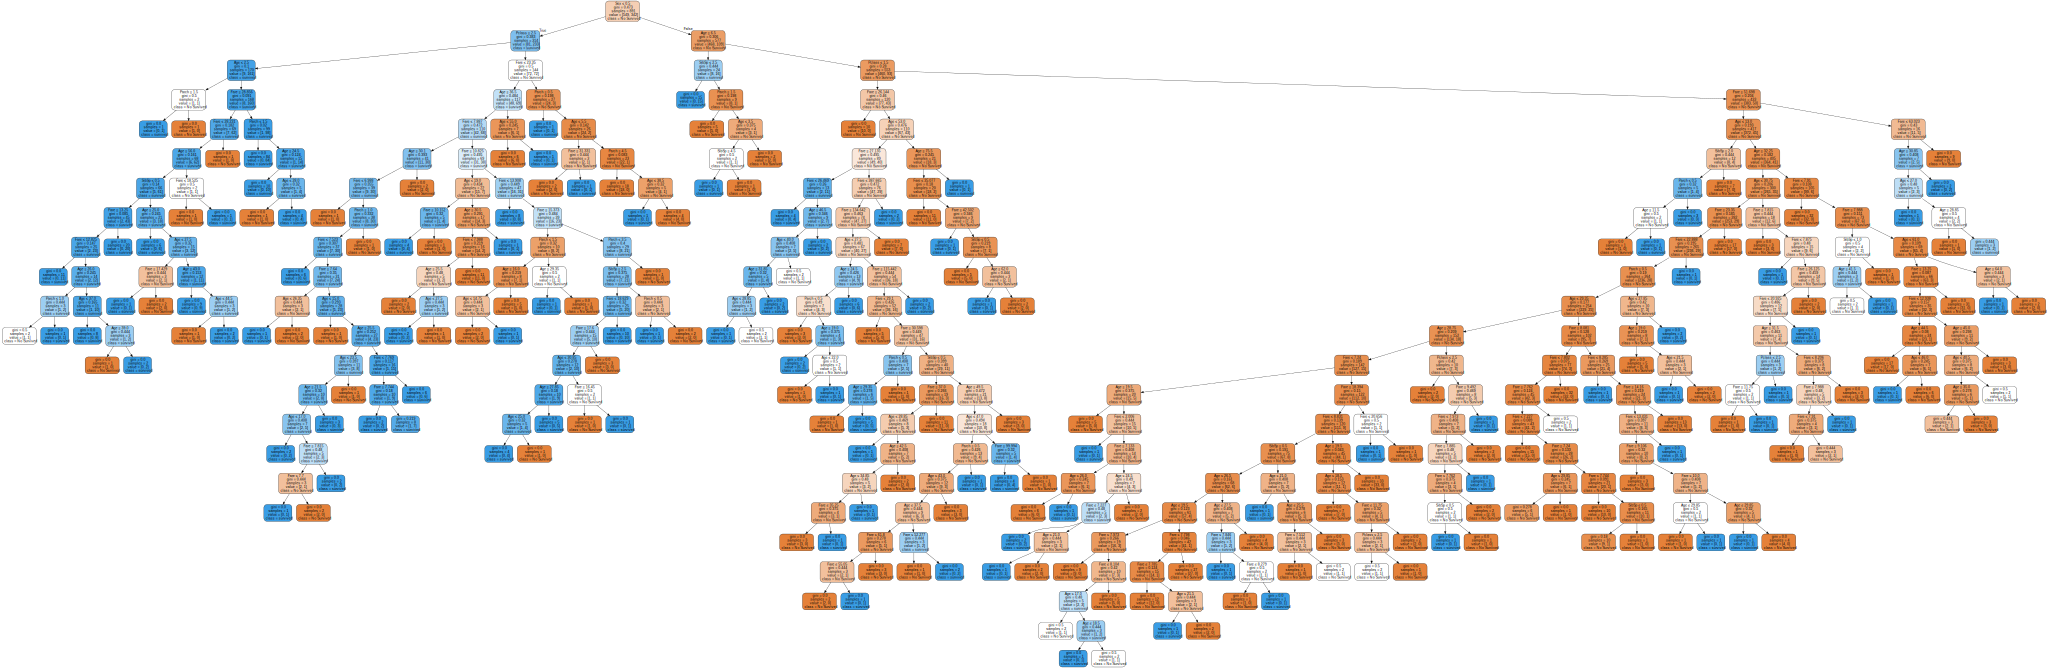

In [18]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns, 
                                class_names=['No Survived', 'survived'], 
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [19]:
dt_predictions = clf.predict(X_test)

In [20]:
df_output = pd.DataFrame({'PassengerId': df_test['PassengerId'].values,'Survived': dt_predictions})
df_output.to_csv('decision_tree_out.csv', index=False)

## Random Forest

In [21]:
from sklearn import ensemble

In [22]:
clf = ensemble.RandomForestClassifier(n_estimators=50, max_depth=5)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
rf_predictions = clf.predict(X_test)

In [24]:
df_output = pd.DataFrame({'PassengerId': df_test['PassengerId'].values,'Survived': rf_predictions})
df_output.to_csv('random_forest_out.csv', index=False)

## Logistic regression

In [25]:
from sklearn import linear_model

In [26]:
clf = linear_model.LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
lg_predictions = clf.predict(X_test)

In [28]:
df_output = pd.DataFrame({'PassengerId': df_test['PassengerId'].values,'Survived': lg_predictions})
df_output.to_csv('logistic_regression_out.csv', index=False)

## Support vector machine

[sklearn flow chart](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)  chart recommends to use Support Vector Machines

In [29]:
from sklearn import svm

clf = svm.LinearSVC()
clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [30]:
acc = clf.score(X, y)
print('SVM training score:', acc * 100)

SVM training score: 76.20650953984287


In [31]:
svm_predictions = clf.predict(X_test)

In [32]:
svm_output = pd.DataFrame({'PassengerId': df_test['PassengerId'].values,'Survived': svm_predictions})
svm_output.to_csv('support_vector_machine_out.csv', index=False)